In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
#warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
 df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:

from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, test_size=0.92141601,random_state=1234, stratify=df["isFraud"])

In [5]:
df_sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4697164,331,CASH_IN,133005.64,C680739392,3167757.18,3300762.82,C669047127,4486834.39,4353828.75,0,0
4655487,330,PAYMENT,64485.36,C1065473491,0.00,0.00,M242730382,0.00,0.00,0,0
3065273,234,PAYMENT,11527.62,C397745410,13217.06,1689.44,M1141131093,0.00,0.00,0,0
3400257,255,CASH_IN,83631.99,C1715671278,21864.00,105495.99,C302766417,3624478.46,3540846.46,0,0
4405604,321,PAYMENT,13185.96,C1539731069,225599.42,212413.46,M558799553,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4718156,332,TRANSFER,846909.93,C1176418861,0.00,0.00,C1547538271,10964923.28,11811833.22,0,0
5668050,396,PAYMENT,16017.14,C550000618,81889.00,65871.86,M1357654180,0.00,0.00,0,0
3841828,282,PAYMENT,1139.82,C1140217339,0.00,0.00,M970021800,0.00,0.00,0,0
3588279,262,CASH_OUT,138101.65,C209628965,125279.72,0.00,C1410964503,419780.30,557881.94,0,0


In [6]:
df_train, df_test = train_test_split(df_sample, test_size=0.2,random_state=1234,stratify=df_sample["isFraud"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=1234,stratify=df_train["isFraud"])

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 4463238 to 2839110
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [8]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df_train.shape

(300000, 11)

In [10]:
df_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4463238,323,CASH_OUT,185930.28,C50931024,372.00,0.00,C561921825,0.0,185930.28,0,0
4771287,334,PAYMENT,10504.27,C41156547,0.00,0.00,M1621663633,0.0,0.00,0,0
1960464,178,PAYMENT,3943.64,C1370897169,0.00,0.00,M1453439039,0.0,0.00,0,0
4361487,309,TRANSFER,680455.87,C546739890,133958.59,0.00,C527545634,2113223.2,2793679.07,0,0
1322499,136,CASH_IN,226914.52,C1379228932,112248.80,339163.32,C1367075498,755898.4,528983.88,0,0
...,...,...,...,...,...,...,...,...,...,...,...
906637,43,PAYMENT,13313.72,C1704441132,0.00,0.00,M1996808909,0.0,0.00,0,0
1429015,139,CASH_IN,481373.70,C2127340592,5363.00,486736.70,C360055630,1094902.5,613528.80,0,0
4257916,306,CASH_OUT,170140.04,C165403677,747228.00,577087.96,C2036805069,551394.1,721534.14,0,0
144871,11,PAYMENT,6921.64,C295591546,281.00,0.00,M488523508,0.0,0.00,0,0


In [11]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.000000
mean,243.344693,1.790712e+05,8.331944e+05,8.548019e+05,1.093945e+06,1.216930e+06,0.001290,0.000003
std,142.276107,6.018346e+05,2.889700e+06,2.925547e+06,3.351587e+06,3.624244e+06,0.035893,0.001826
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.327818e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.425594e+04,1.423150e+04,0.000000e+00,1.316509e+05,2.124745e+05,0.000000,0.000000
75%,334.000000,2.081980e+05,1.069922e+05,1.442824e+05,9.431729e+05,1.108988e+06,0.000000,0.000000
max,742.000000,6.750076e+07,3.741827e+07,3.498450e+07,3.114049e+08,3.114929e+08,1.000000,1.000000


#  StandardScaler 

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_scaler.fit_transform(df_train['step'].values.reshape(-1,1))



# EDA for data

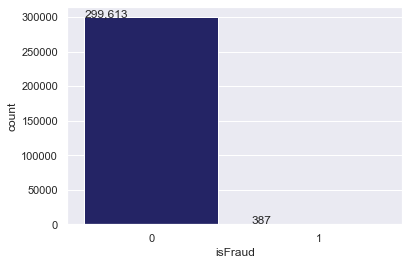

In [13]:
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train , color = "midnightblue")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

The figure above represents the percentage of individuals who said they were fraudulent and non-fraudulent in the random sample

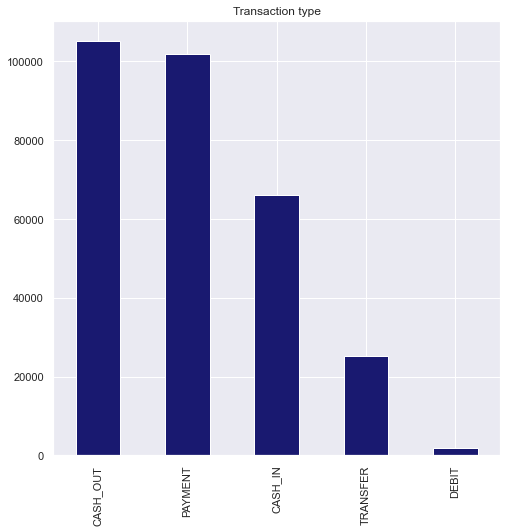

In [14]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df_train.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8) , color = "midnightblue")
plt.ticklabel_format(style='plain', axis='y')

In [15]:
pd.crosstab(df_train['type'], df_train['isFraud'])

isFraud,0,1
type,,
CASH_IN,66024,0
CASH_OUT,104862,203
DEBIT,2006,0
PAYMENT,101776,0
TRANSFER,24945,184


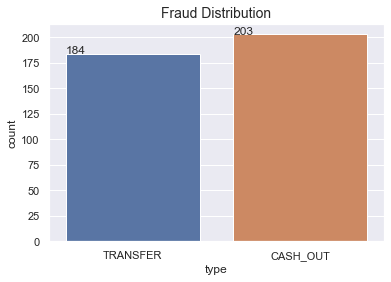

In [16]:
ax=sns.countplot('type', data=df_train[(df_train['isFraud'] == 1)])
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

In the above figure, we notice the most fraudulent operations (TRANSFER & CASH_OUT)

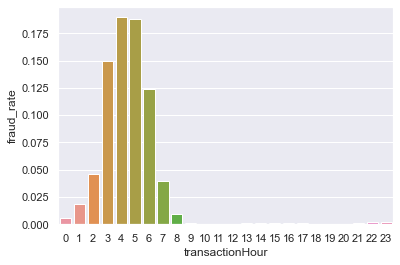

In [17]:
# transaction hour
df_train['transactionHour'] = df_train['step'] % 24

frauds_hour = pd.concat([df_train.groupby("transactionHour")["isFraud"].sum(),df_train.groupby("transactionHour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

In [18]:
# converting into object type
df_train['transactionHour'] = df_train['transactionHour'].astype('object')

Text(0.5, 1.0, 'Average transaction amount at each hour')

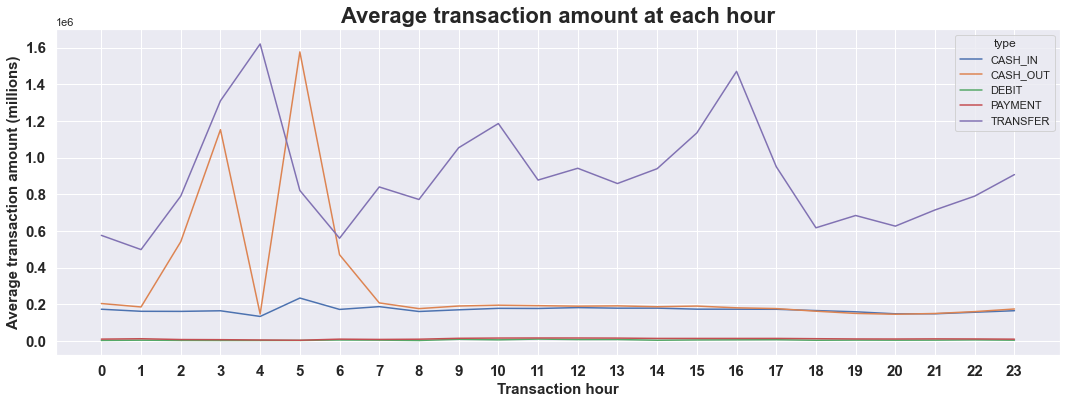

In [19]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_train.groupby(['transactionHour','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='transactionHour',
             y='amount',
             hue='type')
plt.xlabel('Transaction hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Average transaction amount (millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Average transaction amount at each hour', fontsize=22, fontweight='bold')

In the above figure, the process of withdrawing money is done in the late hours of the day

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Amount vs Balance')

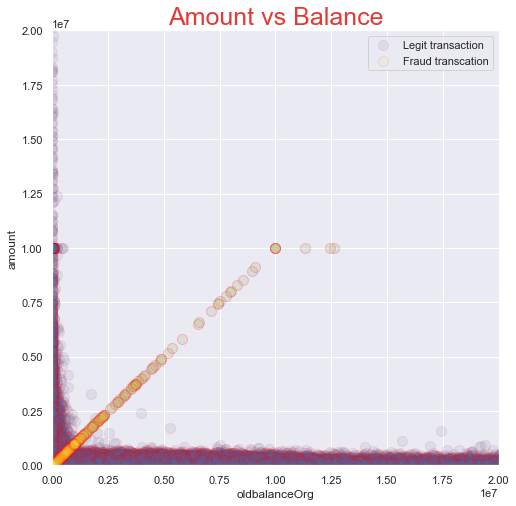

In [20]:
newscatplot=df_train[df_train['isFraud']==1]
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.set_ylim(0,2*1e7)
ax.set_xlim(0,2*1e7)
df_train.plot.scatter(x='oldbalanceOrg',y='amount', ax=ax,edgecolors='red',s=100,alpha=0.1,label="Legit transaction")
newscatplot.plot.scatter(x='oldbalanceOrg',y='amount', color='#FCD735', ax=ax,edgecolors='red',s=100,alpha=0.1,label="Fraud transcation")
plt.title('Amount vs Balance',fontsize=25,color='#E43A36')

The above figure represents the illegal money and how to increase it until it reaches the permissible limit of transfers per day and then stops (example) The permissible limit of transfers per day is $50 at this amount, the customer cannot transfer more than this balance until 24 hours are completed

The goal of retrieval of this data is to understand how this data works within banks, and after reviewing the relationships between them, we will use a classification model. Did this data detect these frauds correctly or not?

We used the form ( RandomForestClassifier )

We will divide the data and test the model (we did a preliminary test for it with validation) and the results were not useful in the evaluation (recall) because we are interested in knowing the scammers whom the model predicted are scammers but gave the opposite result that they are not scammers

In order to evaluate the model, we transform the data categorical into data numerical

In [21]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')],axis=1) 

In [22]:
df_train = df_train.drop(['type'],axis=1)

In [23]:
df_train = df_train.drop(["isFlaggedFraud"],axis=1)

In [24]:
df_train = df_train.drop(['nameOrig',"nameDest"],axis=1)

In [25]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,scaled_amount,scaled_time,transactionHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4463238,323,185930.28,372.00,0.00,0.0,185930.28,0,0.572925,0.469274,11,0,1,0,0,0
4771287,334,10504.27,0.00,0.00,0.0,0.00,0,-0.327066,0.530726,22,0,0,0,1,0
1960464,178,3943.64,0.00,0.00,0.0,0.00,0,-0.360724,-0.340782,10,0,0,0,1,0
4361487,309,680455.87,133958.59,0.00,2113223.2,2793679.07,0,3.109997,0.391061,21,0,0,0,0,1
1322499,136,226914.52,112248.80,339163.32,755898.4,528983.88,0,0.783187,-0.575419,16,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906637,43,13313.72,0.00,0.00,0.0,0.00,0,-0.312653,-1.094972,19,0,0,0,1,0
1429015,139,481373.70,5363.00,486736.70,1094902.5,613528.80,0,2.088643,-0.558659,19,1,0,0,0,0
4257916,306,170140.04,747228.00,577087.96,551394.1,721534.14,0,0.491916,0.374302,18,0,1,0,0,0
144871,11,6921.64,281.00,0.00,0.0,0.00,0,-0.345446,-1.273743,11,0,0,0,1,0


In [26]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [27]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,scaled_amount,scaled_time,transactionHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4463238,323,185930.28,372.00,0.00,0.0,185930.28,0.572925,0.469274,11,0,1,0,0,0
4771287,334,10504.27,0.00,0.00,0.0,0.00,-0.327066,0.530726,22,0,0,0,1,0
1960464,178,3943.64,0.00,0.00,0.0,0.00,-0.360724,-0.340782,10,0,0,0,1,0
4361487,309,680455.87,133958.59,0.00,2113223.2,2793679.07,3.109997,0.391061,21,0,0,0,0,1
1322499,136,226914.52,112248.80,339163.32,755898.4,528983.88,0.783187,-0.575419,16,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906637,43,13313.72,0.00,0.00,0.0,0.00,-0.312653,-1.094972,19,0,0,0,1,0
1429015,139,481373.70,5363.00,486736.70,1094902.5,613528.80,2.088643,-0.558659,19,1,0,0,0,0
4257916,306,170140.04,747228.00,577087.96,551394.1,721534.14,0.491916,0.374302,18,0,1,0,0,0
144871,11,6921.64,281.00,0.00,0.0,0.00,-0.345446,-1.273743,11,0,0,0,1,0


In [28]:
y_train

4463238    0
4771287    0
1960464    0
4361487    0
1322499    0
          ..
906637     0
1429015    0
4257916    0
144871     0
2839110    0
Name: isFraud, Length: 300000, dtype: int64

In [29]:
rf_cfl = RandomForestClassifier(max_depth=2)
rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299613
           1       1.00      0.04      0.07       387

    accuracy                           1.00    300000
   macro avg       1.00      0.52      0.53    300000
weighted avg       1.00      1.00      1.00    300000

[[299613      0]
 [   373     14]]


In [30]:
df_val = pd.concat([df_val, pd.get_dummies(df_val['type'], prefix='type')],axis=1) 
df_val = df_val.drop(['type'],axis=1)
df_val = df_val.drop(["isFlaggedFraud"],axis=1)
df_val = df_val.drop(['nameOrig',"nameDest"],axis=1)
df_val['transactionHour'] = df_val['step'] % 24
#df_train['transactionHour'] = df_train['transactionHour'].astype('object')

In [31]:
y_val = df_val["isFraud"]
X_val= df_val.drop(['isFraud'],axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_val['scaled_amount'] = rob_scaler.fit_transform(df_val['amount'].values.reshape(-1,1))
df_val['scaled_time'] = rob_scaler.fit_transform(df_val['step'].values.reshape(-1,1))


In [33]:
df_val

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,transactionHour,scaled_amount,scaled_time
391111,17,357472.68,11341.0,0.00,10500.00,359316.79,0,0,1,0,0,0,17,1.466802,-1.241667
6173628,564,301067.20,21539.0,0.00,0.00,301067.20,0,0,1,0,0,0,12,1.175491,1.797222
6135800,544,37358.06,5297.0,0.00,0.00,0.00,0,0,0,0,1,0,16,-0.186454,1.686111
4289275,307,21077.62,0.0,0.00,0.00,0.00,0,0,0,0,1,0,19,-0.270535,0.369444
6095300,522,87983.61,40371.0,0.00,0.00,87983.61,0,0,1,0,0,0,18,0.075006,1.563889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926848,350,85518.03,0.0,0.00,897003.91,982521.94,0,0,1,0,0,0,14,0.062272,0.608333
1823445,163,190360.00,81644.0,272004.00,0.00,0.00,0,1,0,0,0,0,19,0.603736,-0.430556
5424833,378,4332.46,11376.0,7043.54,0.00,0.00,0,0,0,0,1,0,18,-0.357017,0.763889
4376443,311,12828.86,17137.0,4308.14,0.00,0.00,0,0,0,0,1,0,23,-0.313136,0.391667


In [34]:
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_cfl = RandomForestClassifier(n_estimators = 200)
rf_cfl.fit(X_val, y_val)

y_predict = rf_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99871
           1       1.00      1.00      1.00       129

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

[[99871     0]
 [    0   129]]


In [36]:
df = pd.read_csv('creditcard.csv')

In [37]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [38]:
%config InlineBackend.figure_format = "svg"

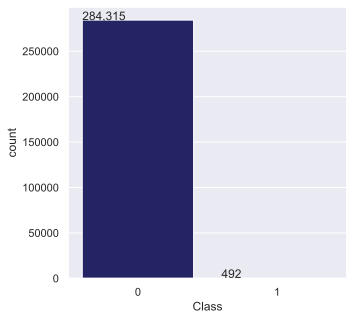

In [39]:
plt.figure(figsize=(5,5))
df['Class'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data=df,color = "midnightblue" )
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
            (p.get_x(), p.get_height()))

In the above figure, 0 represents non-fraudulent individuals - 1 represents fraudulent individuals

In [40]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=123,stratify=df["Class"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["Class"])

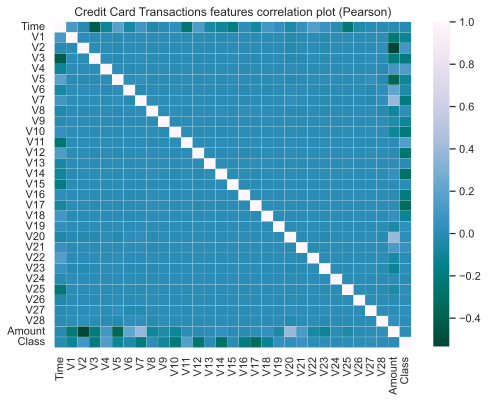

In [41]:
plt.figure(figsize = (8,6))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="PuBuGn_r")
plt.show()

We did not show any relationships, as the above figure is because the data is encrypted


In [42]:
# Statistical data

df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,94776.308632,0.001168,-0.000552,-0.001467,-0.003445,-0.003037,-0.000446,-0.002593,0.001609,-0.000250,...,0.000972,0.001976,0.002108,0.000123,-0.001374,-0.000955,0.000775,0.000118,88.277933,0.001726
std,47493.286230,1.960894,1.664025,1.513203,1.419609,1.371001,1.326401,1.224904,1.207407,1.100535,...,0.747123,0.727807,0.621273,0.605745,0.521656,0.481340,0.399386,0.326564,248.061015,0.041513
min,0.000000,-46.855047,-60.464618,-32.965346,-5.683171,-42.147898,-23.496714,-43.557242,-73.216718,-13.320155,...,-34.830382,-9.499423,-36.666000,-2.836627,-8.696627,-2.604551,-9.793568,-9.617915,0.000000,0.000000
25%,54257.500000,-0.919115,-0.599730,-0.891281,-0.856146,-0.698267,-0.767054,-0.558175,-0.207183,-0.645830,...,-0.228664,-0.540492,-0.161240,-0.354066,-0.317867,-0.327030,-0.070306,-0.053013,5.700000,0.000000
50%,84675.000000,0.019879,0.064686,0.178514,-0.025752,-0.056203,-0.273670,0.038092,0.023326,-0.051130,...,-0.029128,0.009238,-0.009962,0.041257,0.014559,-0.053201,0.001761,0.011237,22.000000,0.000000
75%,139260.000000,1.317510,0.805061,1.027226,0.739981,0.610860,0.398278,0.568317,0.328194,0.597551,...,0.187208,0.530304,0.148918,0.438644,0.348720,0.240187,0.091508,0.078321,77.000000,0.000000
max,172788.000000,2.439207,22.057729,4.226108,16.875344,34.099309,23.917837,44.054461,19.587773,10.392889,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,22.620072,18910.000000,1.000000


In [43]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['Amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_scaler.fit_transform(df_train['Time'].values.reshape(-1,1))

df_train.drop(['Time','Amount'], axis=1, inplace=True)

In [44]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
97401,-0.932087,0.705828,0.800311,-2.286809,0.138517,-0.995096,0.680016,0.076154,0.391838,-1.410968,...,0.732816,-0.281890,0.030574,0.215762,-0.871058,-0.272995,-0.175114,0,-0.140533,-0.217288
62750,-0.101938,0.473848,0.322089,-0.511147,0.206996,1.083175,-1.043374,-2.447632,0.339016,-1.332940,...,0.152972,-0.247357,-1.268945,0.890849,0.694547,0.042810,0.218022,0,0.014025,-0.403070
193370,2.280793,-1.489572,-1.038026,-1.790889,-1.003971,0.064759,-1.356242,0.051946,-1.260549,1.735540,...,-0.003353,0.213888,0.160607,-0.209911,-0.197417,0.008036,-0.055208,0,-0.033661,0.534502
135078,1.158424,0.087118,0.272855,1.205079,-0.026206,0.302304,-0.131135,0.221529,0.231995,0.082498,...,-0.096479,-0.094427,-0.319892,0.640023,-0.305185,0.029366,-0.001272,0,-0.294530,-0.042093
211567,1.423250,-2.265369,-1.240829,-0.778567,-1.003333,0.247268,-0.576459,-0.119540,0.002374,0.542414,...,0.877694,-0.286573,0.051772,-0.221650,-0.096568,-0.058952,0.027431,0,5.610098,0.632840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258474,2.135960,0.150460,-2.438607,-0.014287,1.106147,-0.765626,0.738419,-0.396060,-0.094350,0.217384,...,0.598698,-0.195891,-1.045365,0.616701,-0.049778,-0.059849,-0.093663,0,-0.241374,0.870480
137798,-0.846690,0.730966,-0.267568,0.289898,2.417818,3.721125,-0.355027,1.377504,-0.763934,-0.466334,...,-0.255268,-0.249239,1.020203,0.373593,-0.205774,0.015537,0.000364,0,-0.172370,-0.027599
82661,-0.963280,1.208715,0.187550,0.952846,0.662906,-0.240493,0.127257,0.564588,-0.936360,-0.745909,...,0.371347,-0.217219,-0.423168,-0.341852,-0.312911,-0.042317,0.075818,0,-0.294530,-0.296238
259438,2.285437,-1.530372,-0.907648,-1.934569,-0.901065,0.528246,-1.524621,0.150632,-1.169894,1.677150,...,-0.829866,0.347312,-0.421398,-0.481221,-0.471778,0.026009,-0.046823,0,0.040673,0.875762


In [45]:
X_train = df_train.drop(["Class"], axis = 1)
y_train = df_train["Class"]

# SMOTE for data 

In [46]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=1234)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [47]:
from collections import Counter
counter = Counter(y_train)
for k, v in counter.items():
    dist = v / len(y_train) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= 0, n=170588 (50.0%)
Class= 1, n=170588 (50.0%)


In [48]:
df_val['scaled_amount'] = rob_scaler.fit_transform(df_val['Amount'].values.reshape(-1,1))
df_val['scaled_time'] = rob_scaler.fit_transform(df_val['Time'].values.reshape(-1,1))
df_val.drop(['Time','Amount'], axis=1, inplace=True)

In [49]:
X_val= df_val.drop(["Class"], axis = 1)
y_val = df_val["Class"]



We focus on the people who the model said are legitimate and they are originally illegal



# LogisticRegression Model


In [50]:
log_cfl = LogisticRegression(C=0.95, random_state=0)

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.93      0.11        99

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55442  1421]
 [    7    92]]


# KNN

In [51]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.88      0.60        99

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962

[[56761   102]
 [   12    87]]


# Random Forest Classifier


In [52]:
rf_cfl = RandomForestClassifier(max_depth=2)
rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93    170588
           1       1.00      0.85      0.92    170588

    accuracy                           0.93    341176
   macro avg       0.94      0.93      0.93    341176
weighted avg       0.94      0.93      0.93    341176

[[170322    266]
 [ 25032 145556]]


In [53]:
rf_cfl = RandomForestClassifier(n_estimators = 200)
rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.84      0.85        99

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56850    13]
 [   16    83]]


 After experimenting with more than one model, 
it became clear that the closest to the correct prediction is the SVM model (support vector machine)
it represents to us that the model gave us a correct percentage of 70 percent on the test, meaning that the number of those who said that they are fraudsters and they are in fact fraudulent is 69 people and made a mistake in 29 people

![TLC logo](https://up4net.com/uploads4/up4net.com163985568586481.png)


# Conclusion

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

 • First test results were promising .
 
• Giving future solutions in the form of a model that predicts these frauds

• Detection and investigation of fraud .

• Bypass the identification of potential fraudulent activity and provide a practical framework for dealing with the presence and effects of fraud.